In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

# Define features (X) and target (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target

# Separate categorical and numerical features
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Model

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 112169.9030833
R^2 Score: 0.987791445348444


Plot Outliers

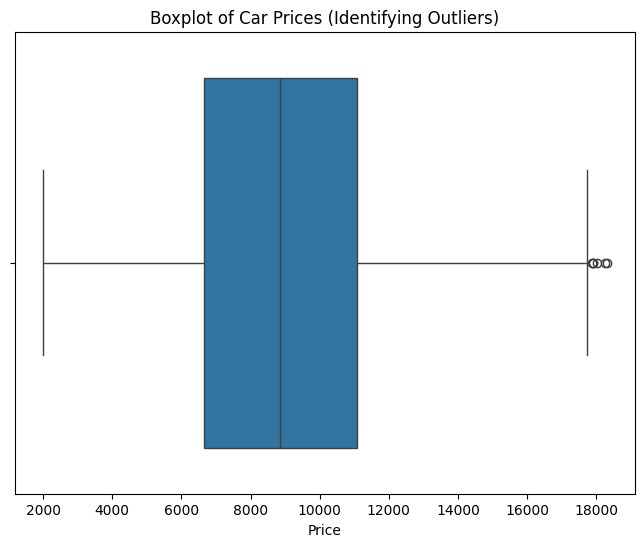

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_price_dataset.csv')

# Plot a boxplot to identify outliers in the 'Price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Car Prices (Identifying Outliers)')
plt.xlabel('Price')
plt.show()

Save the Trained Model

In [4]:
import joblib

# Save the model to a file
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']